In [1]:
# 参考
# https://nbviewer.jupyter.org/github/esafak/mca/blob/master/docs/mca-BurgundiesExample.ipynb

In [2]:
import mca
import pandas as pd
import numpy as np

np.set_printoptions(formatter={'float': '{: 0.4f}'.format})
pd.set_option('display.precision', 5)
pd.set_option('display.max_columns', 25)

In [3]:
import os
os.listdir("../data")

['1-6m-accidents-traffic-flow-over-16-years',
 'avocado.csv',
 'breast_cancer.csv',
 'breast_cancer_coimbra.csv',
 'dataset_01.csv',
 'dataset_for_sensorless_drive_diagnosis.csv',
 'Davis.csv',
 'digits.csv',
 'glass.csv',
 'gps_trajectory_go_track_tracks.csv',
 'gps_trajectory_go_track_trackspoints.csv',
 'iris.csv',
 'isolet5.data',
 'line_access_token.txt',
 'mushroom.csv',
 'Nile.csv',
 'OnlineNewsPopularity.csv',
 'OnlineNewsPopularity_result.csv',
 'pleague_batter_2018.csv',
 'road.csv',
 'sample_chf14.csv',
 'SkillCraft1_Dataset.csv',
 'urban_land_cover_testing.csv',
 'urban_land_cover_training.csv',
 'winequality-red.csv',
 'winequality-white.csv']

In [4]:
df = pd.read_csv("../data/mushroom.csv", header=None, dtype="category")

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [6]:
ctab = pd.crosstab(df[1], df[2])
ctab

2,f,g,s,y
1,,,,
b,52,1,244,155
c,0,1,0,3
f,1016,1,820,1315
k,60,1,418,349
s,32,0,0,0
x,1160,0,1074,1422


In [7]:
# コレスポンデンス分析
ncols = ctab.shape[1]
mca_ben = mca.MCA(ctab, ncols=ncols, benzecri=False)
mca_ben.fs_r()

array([[-0.3050, -0.4052],
       [-9.8466,  5.5127],
       [ 0.0606,  0.0981],
       [-0.2872, -0.4397],
       [ 0.7541,  1.1678],
       [ 0.0547,  0.0489]])

In [8]:
mca_ben.fs_c()

array([[ 0.1942,  0.2713],
       [-10.0739,  5.1282],
       [-0.1307, -0.2522],
       [-0.0235, -0.0017]])

In [9]:
result_row = pd.DataFrame(mca_ben.fs_r())
result_row.index = list(ctab.index)
result_row

,0,1
b,-0.30503,-0.40520
c,-9.84664,5.51267
f,0.06059,0.09806
k,-0.28725,-0.43969
s,0.75406,1.16781
x,0.05470,0.04888


In [10]:
result_col = pd.DataFrame(mca_ben.fs_c(N=2))
result_col.index = list(ctab.columns)
result_col

,0,1
f,0.19421,0.27132
g,-10.07385,5.12818
s,-0.13073,-0.25217
y,-0.02347,-0.00168


C:\Users\tsk_sato\AppData\Roaming\Python\Python36\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


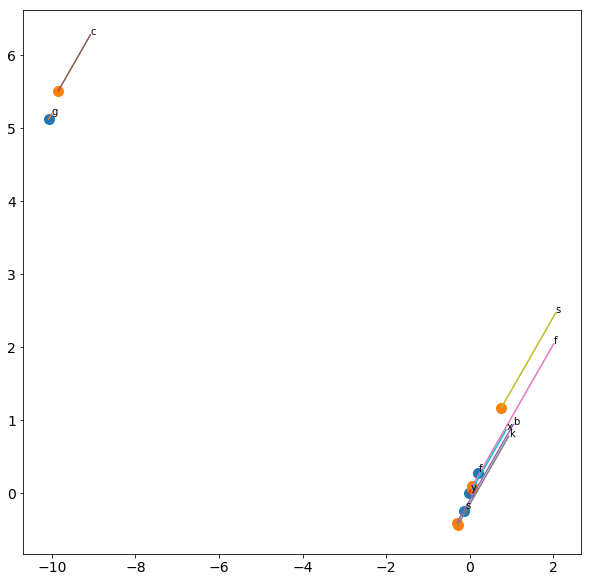

In [11]:
# 作図用ライブラリ
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

plt.rcParams['font.family'] = 'IPAPGothic' #全体のフォントを設定
plt.rcParams["figure.figsize"] = [20, 12] # グラフのサイズを指定
plt.rcParams['font.size'] = 18 #フォントサイズを設定 default : 12
plt.rcParams['xtick.labelsize'] = 14 # 横軸のフォントサイズ
plt.rcParams['ytick.labelsize'] = 14 # 縦軸のフォントサイズ
matplotlib.font_manager._rebuild()

import random as rnd

# 図の設定（任意）
plt.figure(figsize=(10,10))
plt.rcParams["font.size"] = 10

# 表頭をプロット
plt.scatter(result_col[0], result_col[1], s=100, marker="o")

# ラベル付け
cnt = 0
for label in list(result_col.index):
    r = rnd.random() * 0.1
    plt.text(result_col.iloc[cnt, 0]+r, result_col.iloc[cnt, 1]+r, label)
    plt.plot([result_col.iloc[cnt, 0]+r, result_col.iloc[cnt, 0]], [result_col.iloc[cnt, 1]+r, result_col.iloc[cnt, 1]])
    cnt += 1

# 表側をプロット
plt.scatter(result_row[0], result_row[1], s=100, marker="o")
# ラベル付け
cnt = 0
for label in list(result_row.index):
    r = rnd.random()*2
    plt.text(result_row.iloc[cnt, 0]+r, result_row.iloc[cnt, 1]+r, label)
    plt.plot([result_row.iloc[cnt, 0]+r, result_row.iloc[cnt, 0]], [result_row.iloc[cnt, 1]+r, result_row.iloc[cnt, 1]])
    cnt += 1
plt.show()